# Web Scraping Project

In [6]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [7]:


url = "https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)


soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table", {"class": "historical_data_table"})

if not tables:
    raise Exception("No tables found. The page may have changed or content is loaded via JS.")

df = pd.read_html(str(tables[1]))[0]  # tables[0] is Annual, tables[1] is Quarterly

df.columns = ['Date', 'Revenue']
df = df[df['Revenue'] != '']  # Drop empty rows
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

print(df.head())

         Date   Revenue
0  2024-12-31  124300.0
1  2024-09-30   94930.0
2  2024-06-30   85777.0
3  2024-03-31   90753.0
4  2023-12-31  119575.0


<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_52110/271784106.py:17: SyntaxWarning: invalid escape sequence '\$'
  df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/v_/2k7y736n7x103htcsntppd6r0000gn/T/ipykernel_52110/271784106.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]  # tables[0] is Annual, tables[1] is Quarterly


In [8]:
df.shape

(64, 2)

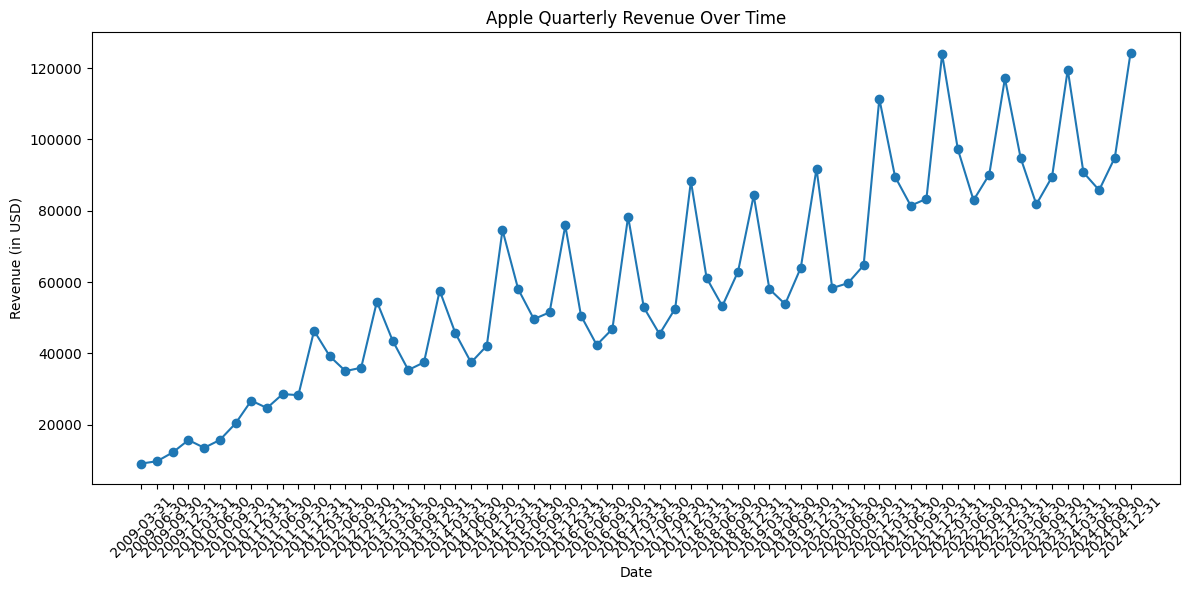

In [9]:
import matplotlib.pyplot as plt
df = df[::-1]  # Reverse the DataFrame to go oldest -> newest
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.title("Apple Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

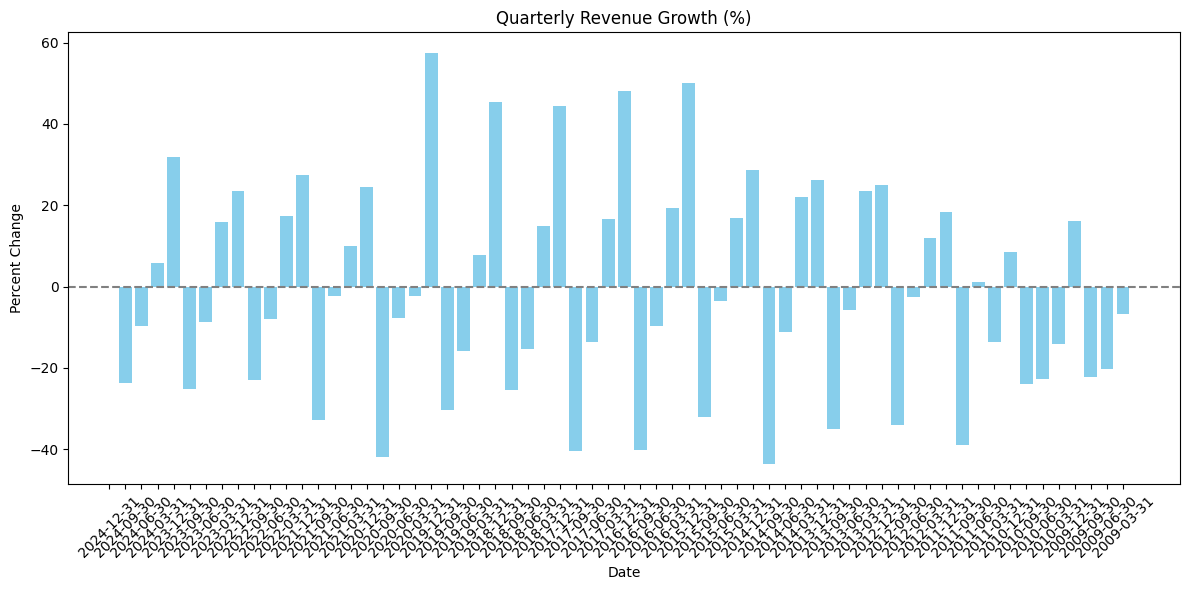

In [10]:
df = df[::-1]  # Make sure it's chronological
df['Revenue Change (%)'] = df['Revenue'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Revenue Change (%)'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Quarterly Revenue Growth (%)")
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()